Este Notebook tiene como la finalidad analizar mediante un EDA el comportamiento de las infracciones de tránsito(Comparendos) en la ciudad de barranquilla, Colombia 
entre los años 2018 y 2023 usando una base datos en sacada de https://www.datos.gov.co/ 

In [1]:
#Importamos las librrias necesarias para la lectura y manipulación del Archivo
import pandas as pd
import numpy as np

In [2]:
#Cargamos el arcivo usando Pandas
datos = pd.read_csv('C:/Users/HP/Documents/Proyectos/Comparendos/Comparendos_Electronicos_Barranquila.csv')

In [3]:
# Usamos el método .info() que nos proporciona información del DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252720 entries, 0 to 252719
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   fecha_comparendo             252720 non-null  object
 1   COD_INFRACCION               252720 non-null  object
 2   DESC_INFRACCION              252720 non-null  object
 3   TIPO_INFRACCION              252720 non-null  object
 4   SERVICIO_VEHICULO_INFRACTOR  252720 non-null  object
 5   CLASE_VEHICULO_INFRACTOR     252720 non-null  object
 6   CANTIDAD_INFRACCIONES        252720 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


In [4]:
#Visualizamos las primeras filas del DataFrame con el método .head() que nos muestra las primeras filas 
datos.head(5)

,fecha_comparendo,COD_INFRACCION,DESC_INFRACCION,TIPO_INFRACCION,SERVICIO_VEHICULO_INFRACTOR,CLASE_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES
0,01/01/2018 12:00:00 AM,C29,Conducir un vehículo a velocidad superior a la...,TRÁNSITO,PARTICULAR,AUTOMOVIL,4
1,01/01/2018 12:00:00 AM,C29,Conducir un vehículo a velocidad superior a la...,TRÁNSITO,PARTICULAR,CAMIONETA,2
2,01/01/2018 12:00:00 AM,C29,Conducir un vehículo a velocidad superior a la...,TRÁNSITO,PARTICULAR,CAMIONETA,1
3,01/01/2018 12:00:00 AM,C29,Conducir un vehículo a velocidad superior a la...,TRÁNSITO,PARTICULAR,AUTOMOVIL,2
4,01/01/2018 12:00:00 AM,C29,Conducir un vehículo a velocidad superior a la...,TRÁNSITO,PARTICULAR,CAMIONETA,3


In [5]:
# Y con el método .tail() vemos las últimas filas
datos.tail(5)

,fecha_comparendo,COD_INFRACCION,DESC_INFRACCION,TIPO_INFRACCION,SERVICIO_VEHICULO_INFRACTOR,CLASE_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES
252715,12/31/2023 12:00:00 AM,D04,No detenerse ante luz roja o amarilla de semáf...,TRÁNSITO,PARTICULAR,AUTOMOVIL,8
252716,12/31/2023 12:00:00 AM,D04,No detenerse ante luz roja o amarilla de semáf...,TRÁNSITO,PARTICULAR,CAMIONETA,2
252717,12/31/2023 12:00:00 AM,D04,No detenerse ante luz roja o amarilla de semáf...,TRÁNSITO,PARTICULAR,CAMPERO,1
252718,12/31/2023 12:00:00 AM,D04,No detenerse ante luz roja o amarilla de semáf...,TRÁNSITO,PARTICULAR,MOTOCICLETA,8
252719,12/31/2023 12:00:00 AM,D04,No detenerse ante luz roja o amarilla de semáf...,TRÁNSITO,PUBLICO,AUTOMOVIL,1


In [6]:
# Con el método .value.counts() nos cuenta cuantas observacion hay por cada categoría que haya en la columna 
datos['TIPO_INFRACCION'].value_counts()


TRÁNSITO    252720
Name: TIPO_INFRACCION, dtype: int64

In [8]:
# Como ves que esa columna tiene los mismo valores para todos los datos y puede que no nos sirva la eliminamos
#con el método .drop()
datos.drop('TIPO_INFRACCION', axis=1, inplace=True)

In [7]:
#Ahora usamos un for para que nos muestre cuantas observaciones hay para cata categoría de las columnas seleccionamos
for i in ['COD_INFRACCION','SERVICIO_VEHICULO_INFRACTOR','CLASE_VEHICULO_INFRACTOR']:
    print(datos[i].value_counts(),'\n')

C02    115916
C29     98892
D04     19940
C03     15619
C32      2353
Name: COD_INFRACCION, dtype: int64 

PARTICULAR     205143
PUBLICO         47013
OFICIAL           562
DIPLOMATICO         2
Name: SERVICIO_VEHICULO_INFRACTOR, dtype: int64 

AUTOMOVIL       126905
CAMIONETA        61655
MOTOCICLETA      26788
CAMPERO          24663
CAMION            5541
BUS               3415
MICROBUS          1692
BUSETA            1013
VOLQUETA           500
TRACTOCAMION       431
MOTOCARRO          112
CUATRIMOTO           5
Name: CLASE_VEHICULO_INFRACTOR, dtype: int64 



In [9]:
# Como vimos la unica columna que es de tipo numéria es 'CANTIDAD_INFRACCIONES'
# Por lo que usamos el metodo .describe() para ver sus estadisticas descriptivas
datos['CANTIDAD_INFRACCIONES'].describe()

count    252720.000000
mean          1.848548
std           2.016172
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          78.000000
Name: CANTIDAD_INFRACCIONES, dtype: float64

Ya habiendo visto como está constituidas las columnas de nuestro DataFrame procedemos a usar librerias y procedimientos
que nos permitan mostran más datos que a simple vista no se encuentran.

In [10]:
# Importamos librerias de visulización que nos permitan mostras nuestros datos de una mejor manera
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Hacemos uso del método de groupby() para agrupar nuestros datos por el tipo de vehículos y ver cuantas infracciones hay por tipo de vehículo
# Lo que hacemos es agrupar por tipo de vehículo y sumar la cantidad de infracciones 
datos_vehiculo = datos.groupby('CLASE_VEHICULO_INFRACTOR').agg({'CANTIDAD_INFRACCIONES': 'sum'}).reset_index()

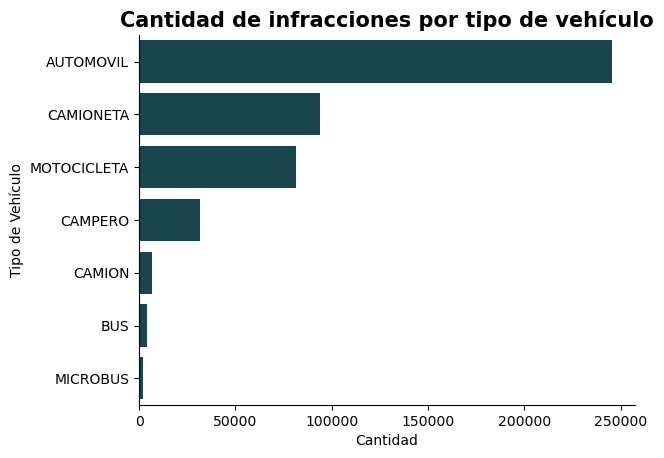

In [13]:
# Establecemos un orden para mostrar los 7 vehículos con más infracciones
top_vehiculos = datos_vehiculo.sort_values(by='CANTIDAD_INFRACCIONES', ascending=False).head(7) 
orden = top_vehiculos['CLASE_VEHICULO_INFRACTOR']
# Hacemos un gráfico de barras para ver la cantidad de infraciones
sns.barplot(data=datos_vehiculo, 
        y= 'CLASE_VEHICULO_INFRACTOR', 
        x= 'CANTIDAD_INFRACCIONES', 
        order=orden,
        color='#104C56')

sns.despine()
plt. title('Cantidad de infracciones por tipo de vehículo',fontsize=15, fontweight='bold')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Vehículo')
plt.show()

In [14]:
# Aqui Calculamos cuantos es el porcentaje de las infracciones que hay por cada grupo
datos_vehiculo['% Infracciones'] = round((datos_vehiculo['CANTIDAD_INFRACCIONES']/sum(datos_vehiculo['CANTIDAD_INFRACCIONES']))*100,3)
datos_vehiculo 

,CLASE_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES,% Infracciones
0,AUTOMOVIL,245264,52.501
1,BUS,4125,0.883
2,BUSETA,1135,0.243
3,CAMION,6707,1.436
4,CAMIONETA,94120,20.147
5,CAMPERO,31496,6.742
6,CUATRIMOTO,5,0.001
7,MICROBUS,1766,0.378
8,MOTOCARRO,112,0.024
9,MOTOCICLETA,81435,17.432


De los calculos realizados podemos extraer que, el automovíl es el tipo de vehículo que mas infraciones ha cometido en el periodo de tiempo estudiado,
en la tabla se puede observar que esta categoría tiene casi 250mil infracciones que representan casi el 53% de infracciones de toda la muestra, 
en segundo lugar tenemos la camineta con un 20% de las infraciones y tercer lugar para las motocicletas con un 17% de infracciones.

In [15]:
# Aquí hacemos el mismo procedimiento que antes pero esta vez agrupamos por el tipo de infracción 
datos_infraccion= datos.groupby('COD_INFRACCION').agg({'CANTIDAD_INFRACCIONES': 'sum'}).reset_index()
# Calculamos el porcentaje para cada grupo de infracción
datos_infraccion['% Del Total']= round((datos_infraccion['CANTIDAD_INFRACCIONES']/sum(datos_vehiculo['CANTIDAD_INFRACCIONES']))*100,2)
datos_infraccion

,COD_INFRACCION,CANTIDAD_INFRACCIONES,% Del Total
0,C02,146602,31.38
1,C03,42650,9.13
2,C29,232784,49.83
3,C32,2619,0.56
4,D04,42510,9.10


In [17]:
# para saber a que infracción pertenece cada código hacemos uso de varios métodos de pandas para procesar la información 
# Primero usamos .unique() que saca los valores único de la columna transformamos esos valores a un serie de pandas 
# Y por ultimo las concatenamos en un dataframe de pandas axis=1 para que se contatenen de manera vertical
infracciones= pd.concat([pd.Series(datos['COD_INFRACCION'].unique()),pd.Series(datos['DESC_INFRACCION'].unique())],axis=1)
# Ahora usamos un for para recorre las filas del dataframe e imprimir el código y la descrpción de las infracción
for index, row in infracciones.iterrows():
    print(f'{row[0]}: {row[1]}')

C29: Conducir un vehículo a velocidad superior a la máxima permitida, la cual deberá estar señalizada en forma sectorizada, la cual no podrá ser superior
C32: No respetar el paso de peatones que cruzan una vía en sitio permitido para ellos o no darles la prelación en las franjas para ello establecidas
D04: No detenerse ante luz roja o amarilla de semáforo,una señal de PARE,un semáforo intermitente en rojo. En el caso de motocicletas se procederá a la inmovilización hasta tanto no pague el valor de la multa o a la autoridad competente decida sobre si imposición en los términos de los art 135,136 CNT
C02: Estacionar un vehículo en los sitios prohibidos
C03: Bloquear una calzada o intersección con un vehículo, salvo cuando el bloqueo obedezca a la ocurrencia de un accidente


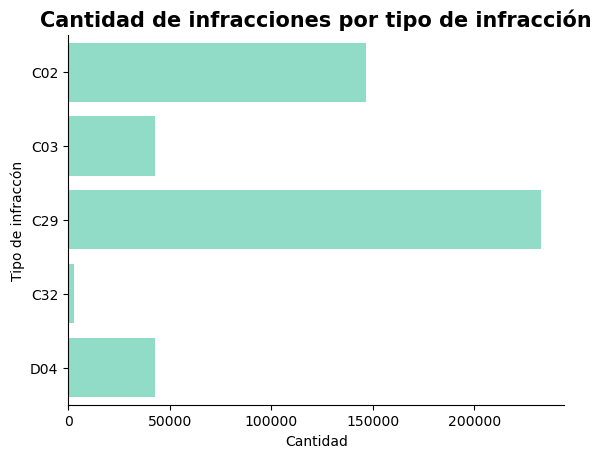

In [18]:
# Hacemos un gráfico de barras para mostrar los datos 
sns.barplot(data=datos_infraccion, 
            y= 'COD_INFRACCION', 
            x= 'CANTIDAD_INFRACCIONES',
            color='#83E9CD')

sns.despine()
plt. title('Cantidad de infracciones por tipo de infracción',fontsize=15, fontweight='bold')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de infraccón')
plt.show()

Viendo los datos extraidos podemos observar que la multa C29 es la multa en la que más infligen los conductores en Barranquilla con más de 
230mil infracciones y casi un 50% del total de infracciones de muestra, seguida de la multa C02 con 31% y más de 140mil multas realizadas.


In [25]:
# Ahora agrupamos por el tipo de servicio del vehículo que comete la infracción 
datos_vehi_servicio= datos.groupby('SERVICIO_VEHICULO_INFRACTOR').agg({'CANTIDAD_INFRACCIONES': 'sum'}).reset_index()
# Calulamos el porcentaje del total de las infracciones
datos_vehi_servicio['% Del Total']= round((datos_vehi_servicio['CANTIDAD_INFRACCIONES']/sum(datos_vehi_servicio['CANTIDAD_INFRACCIONES']))*100,4)
datos_vehi_servicio

,SERVICIO_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES,% Del Total
0,DIPLOMATICO,2,0.0004
1,OFICIAL,565,0.1209
2,PARTICULAR,398323,85.2639
3,PUBLICO,68275,14.6148


Y vemos que el 85% de las infracciones las realizan los conductores de vehículos particulares, seguidos por los del servicio público.

In [19]:
# Aquí agrupamos por la infracción y por el tipo de vahículo
#Con esta doble agrupación podemos ver dentro de cada tipo de infracción la cantidad por cada tipo de vehículo  
total_infracciones= datos.groupby(['COD_INFRACCION','CLASE_VEHICULO_INFRACTOR']).agg({'CANTIDAD_INFRACCIONES':'sum'}).reset_index()
total_infracciones['% Por grupo']= round((total_infracciones['CANTIDAD_INFRACCIONES']/total_infracciones.groupby('COD_INFRACCION')['CANTIDAD_INFRACCIONES'].transform('sum'))*100,3)
total_infracciones

,COD_INFRACCION,CLASE_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES,% Por grupo
0,C02,AUTOMOVIL,96785,66.019
1,C02,BUS,75,0.051
2,C02,BUSETA,34,0.023
3,C02,CAMION,1374,0.937
4,C02,CAMIONETA,36302,24.762
5,C02,CAMPERO,11729,8.001
6,C02,MICROBUS,290,0.198
7,C02,MOTOCARRO,1,0.001
8,C02,TRACTOCAMION,2,0.001
9,C02,VOLQUETA,10,0.007


Con la tabla anterior podemos observar la cantidad de infracciones por tipo de vehiculo y tipo de infracción. Donde podemos observar que el automovíl
en la mayoría de las categorías de infracciones es el tipo de vehículo con más porcentaje.

In [20]:
#Transformamos la columna de 'fecha comparendo' a tipo fecha para poder hacer multiples operaciones que nos permitan evaluar en períodos de tiempo
datos['fecha_comparendo'] = pd.to_datetime(datos['fecha_comparendo'])
datos.dtypes

fecha_comparendo               datetime64[ns]
COD_INFRACCION                         object
DESC_INFRACCION                        object
SERVICIO_VEHICULO_INFRACTOR            object
CLASE_VEHICULO_INFRACTOR               object
CANTIDAD_INFRACCIONES                   int64
dtype: object

In [22]:
# Tomamos las columnas que vamos a estudiar y formamos un DataFrame con esas columnas
infracciones_mes= datos[['fecha_comparendo','CANTIDAD_INFRACCIONES']]
# Colocamos la columna de fecha como índice del DataFrame
infracciones_mes= infracciones_mes.set_index('fecha_comparendo')
# Usamos el resample('M') que es un método que nos permite hacer una conversión a una frecuencia de tiempo, en este caso es 'M' de Month, es decir, mes
infracciones_mes= infracciones_mes.resample('M').sum().reset_index()
# Vemos como se han sumado la cantidad de infracciones por mes
infracciones_mes

,fecha_comparendo,CANTIDAD_INFRACCIONES
0,2018-01-31,8134
1,2018-02-28,6438
2,2018-03-31,7333
3,2018-04-30,6871
4,2018-05-31,7173
...,...,...
67,2023-08-31,8380
68,2023-09-30,8684
69,2023-10-31,8278
70,2023-11-30,7432


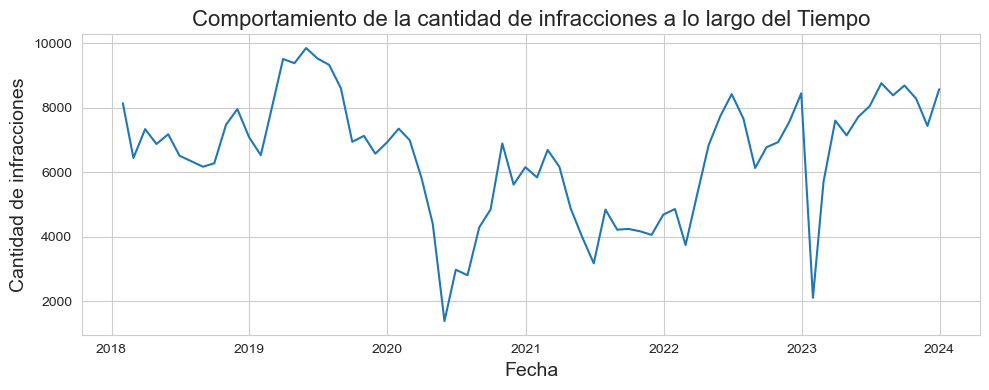

In [22]:
# Hacemos un gráfico que nos muestre como es el comportamiento de las infracciones por mes
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))

sns.lineplot(data=infracciones_mes, x='fecha_comparendo', y='CANTIDAD_INFRACCIONES')

plt.title('Comportamiento de la cantidad de infracciones a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de infracciones', fontsize=14)

plt.tight_layout()
plt.show()

In [24]:
# AHora tomamos las columnas para crear un DataFrame quenos permita ver el comportaminedo de las infracciones por tipo de Vehículo
infracciones_mes_tipo= datos[['fecha_comparendo', 'CLASE_VEHICULO_INFRACTOR','CANTIDAD_INFRACCIONES']]
# Aqui agrupamos por mes usando dt.to.timestamp('M') para agruparo por periodos 
infracciones_mes_tipo = infracciones_mes_tipo.groupby([infracciones_mes_tipo['fecha_comparendo'].dt.to_period('M'), 'CLASE_VEHICULO_INFRACTOR']).agg({'CANTIDAD_INFRACCIONES': 'sum'}).reset_index()
# Ahora transformamos la columna 'fecha_comparendo' de periodo a tipo Timestamp, para que quedne en formato de marca de tiempo 
infracciones_mes_tipo['fecha_comparendo'] = infracciones_mes_tipo['fecha_comparendo'].dt.to_timestamp()
# Despues nos quedamos con las obervaciones que estén dentro de las categorías que seleccionamos con .isin()
infracciones_mes_tipo = infracciones_mes_tipo[infracciones_mes_tipo['CLASE_VEHICULO_INFRACTOR'].isin(['AUTOMOVIL', 'CAMIONETA', 'CAMPERO', 'MOTOCICLETA'])]
# Vemos los resultados 
infracciones_mes_tipo

,fecha_comparendo,CLASE_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES
0,2018-01-01,AUTOMOVIL,4342
4,2018-01-01,CAMIONETA,1523
5,2018-01-01,CAMPERO,595
9,2018-01-01,MOTOCICLETA,1444
12,2018-02-01,AUTOMOVIL,3437
...,...,...,...
761,2023-11-01,MOTOCICLETA,860
764,2023-12-01,AUTOMOVIL,4574
768,2023-12-01,CAMIONETA,2043
769,2023-12-01,CAMPERO,502


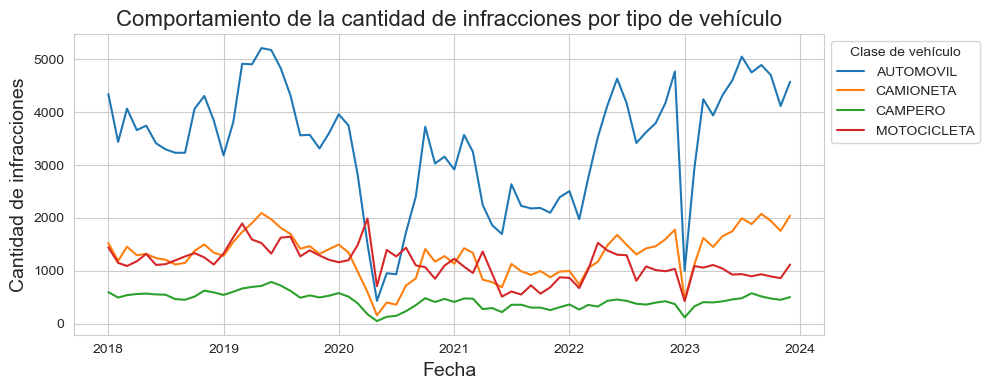

In [26]:
# Hacemos un grafico que nosperimta observar el comportamiento por tipo de vehículo
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))

sns.lineplot(data=infracciones_mes_tipo, x='fecha_comparendo', y='CANTIDAD_INFRACCIONES', hue='CLASE_VEHICULO_INFRACTOR')

plt.title('Comportamiento de la cantidad de infracciones por tipo de vehículo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de infracciones', fontsize=14)
plt.legend(title='Clase de vehículo', loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [27]:
# Aqui realizamos el mismo procedimiento anterior, pero esta vez para ver le comportamiento por tipo de infracción
infracciones_tipo= datos[['fecha_comparendo', 'COD_INFRACCION','CANTIDAD_INFRACCIONES']]
infracciones_tipo = infracciones_tipo.groupby([infracciones_tipo['fecha_comparendo'].dt.to_period('M'), 'COD_INFRACCION']).agg({'CANTIDAD_INFRACCIONES': 'sum'}).reset_index()
infracciones_tipo['fecha_comparendo'] = infracciones_tipo['fecha_comparendo'].dt.to_timestamp()

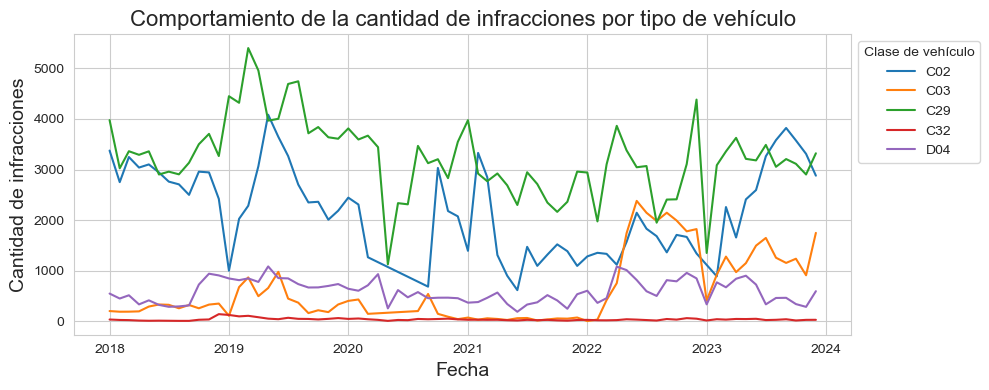

In [28]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))

sns.lineplot(data=infracciones_tipo, x='fecha_comparendo', y='CANTIDAD_INFRACCIONES', hue='COD_INFRACCION')

plt.title('Comportamiento de la cantidad de infracciones por tipo de vehículo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de infracciones', fontsize=14)
plt.legend(title='Clase de vehículo', loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Buscando en internet pude encontrar el valor de cada infracción, lo cual nos permetirá calcular cuanto es el total de dinero que se espera
recibir por cada tipo de infracción.

Fuente: https://www.okatwork.co/listado-infracciones-de-transito-colombia-resolucion-3027-de-2010.html

In [29]:
# Seleccionamos las columnas que vamos utilizar 
valor_infracciones = datos[['COD_INFRACCION','CANTIDAD_INFRACCIONES']]
# Agrupamos por tipo de infracción y sumamos la cantidad de infracciones
valor_infracciones= valor_infracciones.groupby('COD_INFRACCION').agg({'CANTIDAD_INFRACCIONES':'sum'}).reset_index()
# Creamo una columna nueva para reemplazar los valores
valor_infracciones['VALOR_INFRACCION']= valor_infracciones['COD_INFRACCION']
# Creamos una variable de mapeo
mapeo= {
    'C02': 572600,
    'C03': 572600,
    'C29': 572600,
    'C32': 572600,
    'D04': 1144900,
}
# Usamos la variable de mapeo para reemplazar los valores con el método .replace()
valor_infracciones['VALOR_INFRACCION'].replace(mapeo, inplace=True)
# Multiplicamos el valor de la infracción por la cantidad
valor_infracciones['VALOR_TOTAL']= valor_infracciones['CANTIDAD_INFRACCIONES']*valor_infracciones['VALOR_INFRACCION']
# Damos unn formato mas legible a los valores resultantes
valor_infracciones[['VALOR_INFRACCION', 'VALOR_TOTAL']] = valor_infracciones[['VALOR_INFRACCION', 'VALOR_TOTAL']].applymap(lambda x: '{:,.0f}'.format(x).replace(',', '.'))
# Mostramos los resultados 
valor_infracciones


,COD_INFRACCION,CANTIDAD_INFRACCIONES,VALOR_INFRACCION,VALOR_TOTAL
0,C02,146602,572.600,83.944.305.200
1,C03,42650,572.600,24.421.390.000
2,C29,232784,572.600,133.292.118.400
3,C32,2619,572.600,1.499.639.400
4,D04,42510,1.144.900,48.669.699.000


Con esta tabla observamos el valor estimado de dinero que se espera recibir por el tipo de infracción.

In [54]:
# Seleccionamos las columnas de interes  
infraccion_year= datos[['fecha_comparendo','CANTIDAD_INFRACCIONES']]
# Ahora  agrupamos el Data Frame por año
infraccion_year= infraccion_year.set_index('fecha_comparendo')
infraccion_year= infraccion_year.resample('Y').sum().reset_index()
# Calculamos la variación bruta con el método .diff()
infraccion_year['VARIACION'] = infraccion_year['CANTIDAD_INFRACCIONES'].diff()
# Caculamos la variación porcentual con el método .pct_change() lo multiplicamos por 100 y usamos round() para dejarlo con 2 deciamales
infraccion_year['%_VARIACION'] = round(infraccion_year['CANTIDAD_INFRACCIONES'].pct_change() * 100,2)
# Como el año 2018 no tiene variación ya que es el primer año de la muestra al aplicar el métdodo diff() de vuelve NaH por eso usamos .fillna() para poner 0
infraccion_year.fillna(0, inplace=True)
# Y cambiamos el tipo de dato para la columna VARIACION para dejarlo como un número entero y no como tipo float
infraccion_year['VARIACION'] = round(infraccion_year['VARIACION']).astype(int)
infraccion_year

,fecha_comparendo,CANTIDAD_INFRACCIONES,VARIACION,%_VARIACION
0,2018-12-31,83741,0,0.00
1,2019-12-31,98171,14430,17.23
2,2020-12-31,59526,-38645,-39.36
3,2021-12-31,56915,-2611,-4.39
4,2022-12-31,80415,23500,41.29
5,2023-12-31,88397,7982,9.93


Con esta última tabla podemos ver como el total de infracciones por año asi como su variación bruta y porcentual.

Gracias por ver!!!

Juan Camilo Torres Salas
Linkedin: www.linkedin.com/in/juan-camilo-torres-salas-907749265